In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline
track_df = pd.read_csv("C://Users//CTurner//Downloads//SpotifyDatasets//tracks.csv")
track_df.shape






(586672, 20)

In [272]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [273]:
track_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [274]:
track_df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [275]:
track_df = track_df.dropna()

In [276]:
track_df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [277]:
#categories
track_cat = track_df.select_dtypes(include = 'object')
track_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            586601 non-null  object
 1   name          586601 non-null  object
 2   artists       586601 non-null  object
 3   id_artists    586601 non-null  object
 4   release_date  586601 non-null  object
dtypes: object(5)
memory usage: 26.9+ MB


In [278]:
#cardinality
for col in track_cat.columns:
    print(f'{col}: {track_cat[col].nunique()}')
    print('/n')

id: 586601
/n
name: 446474
/n
artists: 114029
/n
id_artists: 115062
/n
release_date: 19698
/n


Text(0.5, 1.0, 'Cardinality')

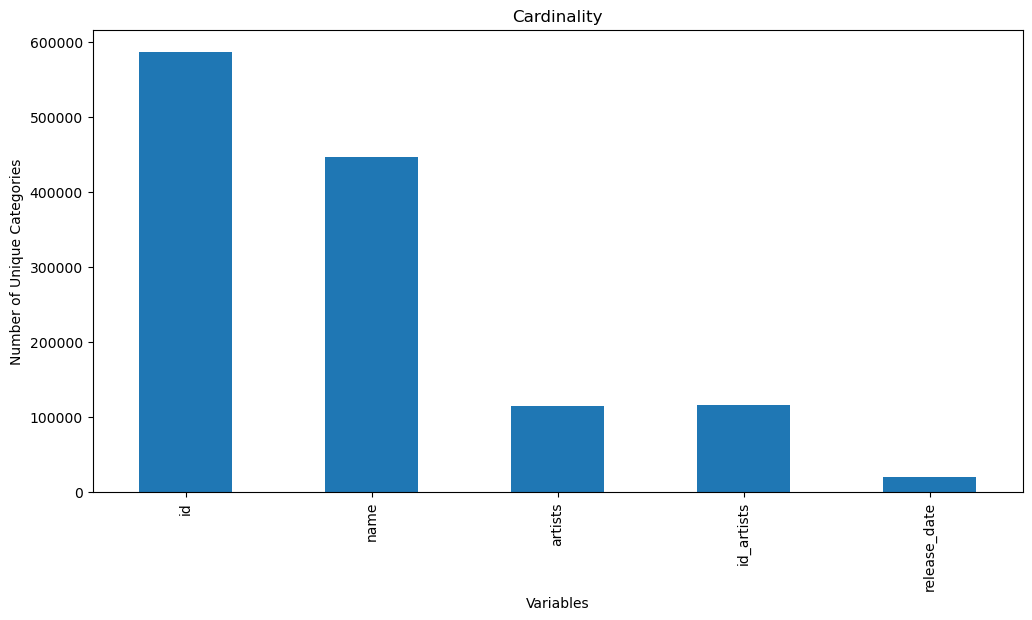

In [279]:
#plot cardinality
track_cat.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of Unique Categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [280]:
#find artists with most songs
prolific_artists = track_df['artists'].value_counts().head(20)
prolific_artists

['Die drei ???']                              3856
['TKKG Retro-Archiv']                         2006
['Benjamin Blümchen']                         1503
['Bibi Blocksberg']                           1472
['Lata Mangeshkar']                           1373
['Bibi und Tina']                              927
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     905
['Francisco Canaro']                           891
['Ella Fitzgerald']                            870
['Tadeusz Dolega Mostowicz']                   838
['Fünf Freunde']                               812
['Mohammed Rafi']                              787
['Queen']                                      777
['Elvis Presley']                              680
['Frank Sinatra']                              680
['The Rolling Stones']                         654
['Die Originale']                              638
['Billie Holiday']                             609
['Julio Iglesias']                             595
['Globi']                      

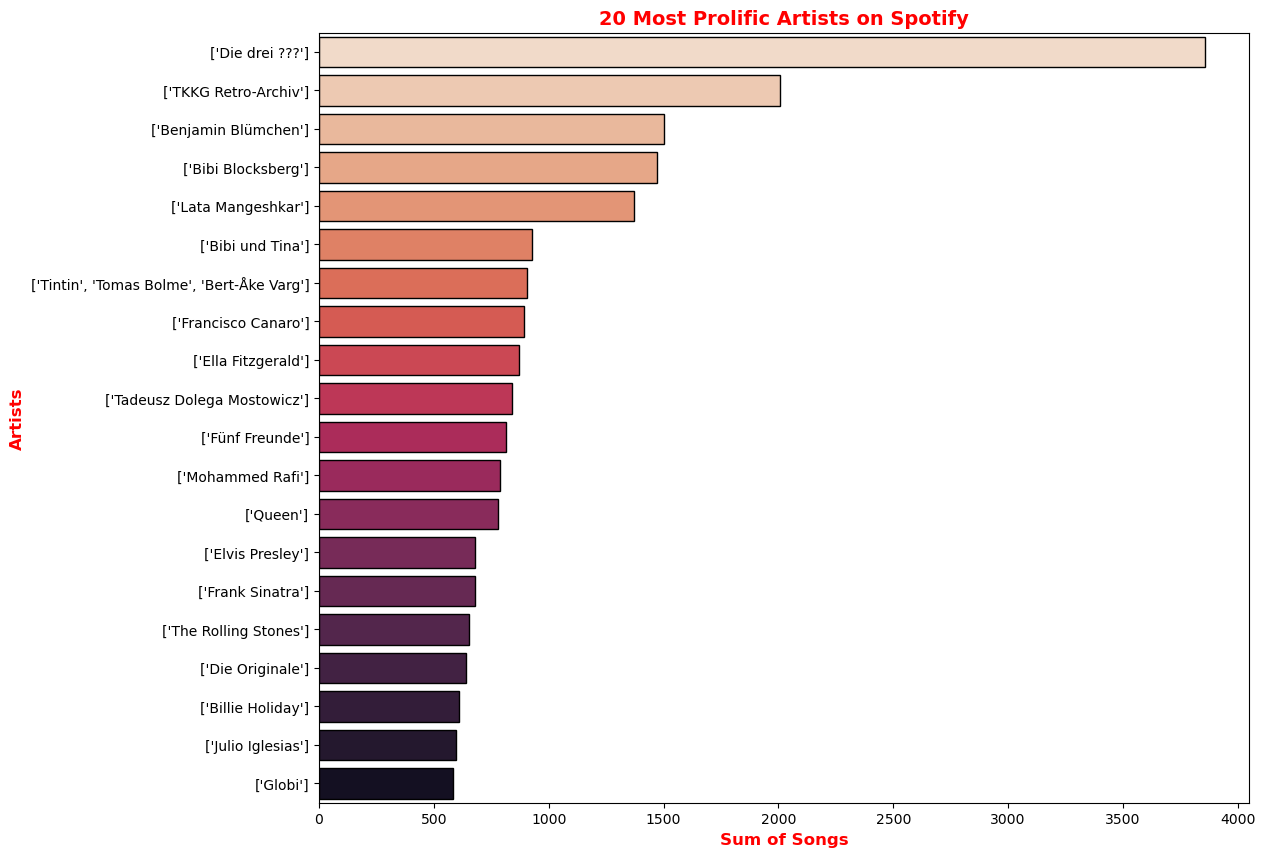

In [281]:
#barplot artists by sum of songs
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.barplot(x = prolific_artists.values, y = prolific_artists.index, palette = 'rocket_r', orient = 'h', edgecolor = 'black', ax = ax)
ax.set_xlabel('Sum of Songs', c = 'r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists',c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Prolific Artists on Spotify', c= 'r', fontsize = 14, weight = 'bold')
plt.show()

In [262]:
#identify audio book/podcasts by speechiness. Noticed top prolific artist was audiobook.
track_type =  pd.cut(track_df.speechiness, bins = [0,.03,.80,1], labels=['Non-Lyrical', 'Layered-Musical', 'Spoken Word'])
track_df.insert(20,'Track_Type', track_type)
track_df.sample(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Track_Type
282677,7nX0ISA5uWuhxAjMgXH5au,"Thieves like Us - 12"" Extended",39,396867,0,['New Order'],['0yNLKJebCb8Aueb54LYya3'],1987-08-17,0.637,0.6290,...,-11.266,1,0.0281,0.00759,0.002560,0.0794,0.927,113.220,4,Non-Lyrical
258131,715RcHxGrHhumNYrnM73lt,"Kým nezaspím, spievam",5,173613,0,['Karol Duchoň'],['7t9Ee452yVH58xneswOHNH'],1974-01-01,0.474,0.6580,...,-5.029,1,0.0289,0.01510,0.000000,0.0644,0.620,125.894,4,Non-Lyrical
399229,695AOnYHYnvHIMaTNKjkA5,Felicità puttana,59,219807,0,['Thegiornalisti'],['6YBgd2LKccEB3pX6UaW1Yp'],2018-09-21,0.692,0.8560,...,-4.816,1,0.1270,0.00763,0.000019,0.3050,0.686,93.975,4,Layered-Musical
408775,0ed89V9Y28zCVGjaZeBErT,握別,19,224507,0,['環球合唱團'],['4Idaf5yxFFv74CoOSHW3jA'],1985-05-01,0.252,0.0770,...,-21.556,1,0.0395,0.97100,0.000072,0.0821,0.166,69.963,4,Layered-Musical
336377,6UyPvvQuMzdCvat61plRu6,อ้าว,43,251787,0,['Atom Chanakan'],['2iLCiSxdwUMDEfqyfkuLEw'],2017-12-07,0.692,0.5720,...,-7.845,1,0.0329,0.61400,0.000316,0.3730,0.820,105.048,4,Layered-Musical
142647,3vvF6cXelFIhQJcZOv1yse,Papel De Payaso,19,271796,0,['Bobby Valentin'],['7nJ3uKCT4lPwDJSRZzBlss'],1972-01-12,0.596,0.4440,...,-10.974,0,0.1080,0.50300,0.430000,0.0900,0.788,99.553,4,Layered-Musical
433145,68C2LP25ewkWaXrHlRiJtq,Tentando Me Evitar,37,246160,0,['Banda Magníficos'],['74B3SJ1xNHK3VS4T9i2TvQ'],1997,0.526,0.7080,...,-8.579,1,0.0414,0.43600,0.000000,0.3020,0.712,93.745,4,Layered-Musical
7935,6H191BWrcqLjcOWpiLwJFu,La Sevillana del Barbero - Remasterizado,0,186507,0,"['Francisco Canaro', 'Agustín Irusta']","['2maQMqxNnlRrBrS1oAsrX9', '1QzkpIrrMhBwTa1eb7...",1932-12-26,0.715,0.4260,...,-10.924,0,0.0508,0.95600,0.057100,0.6550,0.928,123.218,4,Layered-Musical
317907,0E4XE7KOT3S8eNTvVkxfC9,Vögguvísa,18,90651,0,['Edda Heiðrún Backman'],['0QTRoLzdxFIseCfq9djuSX'],1990-01-01,0.521,0.0742,...,-16.808,1,0.0327,0.91500,0.109000,0.1600,0.307,105.643,4,Layered-Musical
496036,20VSa8XVntmoJUnZl8RreA,Kapitel 29 - als Bürgermeister (Folge 057),27,67736,0,['Benjamin Blümchen'],['1l6d0RIxTL3JytlLGvWzYe'],1987,0.698,0.5660,...,-11.610,0,0.9210,0.61700,0.000000,0.3050,0.529,104.358,4,Spoken Word


In [263]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                586601 non-null  object  
 1   name              586601 non-null  object  
 2   popularity        586601 non-null  int64   
 3   duration_ms       586601 non-null  int64   
 4   explicit          586601 non-null  int64   
 5   artists           586601 non-null  object  
 6   id_artists        586601 non-null  object  
 7   release_date      586601 non-null  object  
 8   danceability      586601 non-null  float64 
 9   energy            586601 non-null  float64 
 10  key               586601 non-null  int64   
 11  loudness          586601 non-null  float64 
 12  mode              586601 non-null  int64   
 13  speechiness       586601 non-null  float64 
 14  acousticness      586601 non-null  float64 
 15  instrumentalness  586601 non-null  float64 
 16  li

In [264]:
type_list = list(track_df['Track_Type'].unique())
print('number of types: ', len(type_list))
type_count = pd.DataFrame({'Track_Valuecount' :track_df['Track_Type'].value_counts().head(10)})
type_count.style.background_gradient()

number of types:  4


,Track_Valuecount
Layered-Musical,494836
Non-Lyrical,70761
Spoken Word,20675


In [265]:
Typecnt = track_df['Track_Type'].value_counts().head(20)
Typecnt

Layered-Musical    494836
Non-Lyrical         70761
Spoken Word         20675
Name: Track_Type, dtype: int64

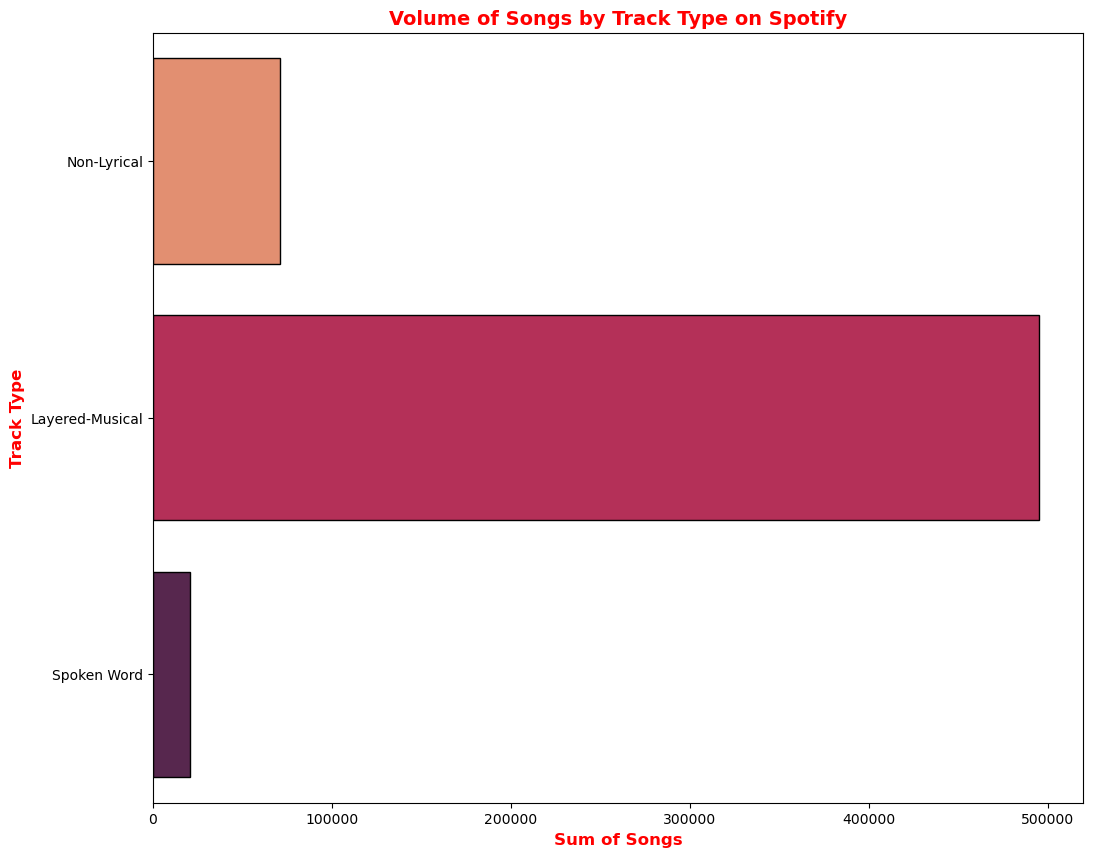

In [266]:
#barplot artists by sum of songs
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.barplot(x = Typecnt.values, y = Typecnt.index, palette = 'rocket_r', orient = 'h', edgecolor = 'black', ax = ax)
ax.set_xlabel('Sum of Songs', c = 'r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Track Type',c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('Volume of Songs by Track Type on Spotify', c= 'r', fontsize = 14, weight = 'bold')
plt.show()

In [282]:
track_df = track_df.set_index('popularity')
track_df = track_df.sort_index(ascending=False)

In [268]:
non_lyric_mask = track_df.loc[:,'Track_Type'] == 'Non-Lyrical'
track_df.loc[non_lyric_mask,:]

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Track_Type
popularity,,,,,,,,,,,,,,,,,,,,
94,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,161385,1,['The Kid LAROI'],['2tIP7SsRs7vjIcLrU85W8J'],2020-11-06,0.662,0.4130,0,-7.357,1,0.0299,0.2130,0.000000,0.1340,0.4670,93.005,4,Non-Lyrical
90,6fRxMU4LWwyaSSowV441IU,Beautiful Mistakes (feat. Megan Thee Stallion),227395,0,"['Maroon 5', 'Megan Thee Stallion']","['04gDigrS5kc9YWfZHwBETP', '181bsRPaVXVlUKXrxw...",2021-03-03,0.713,0.6760,10,-5.483,1,0.0270,0.0377,0.000000,0.1540,0.7210,99.048,4,Non-Lyrical
88,0E4Y1XIbs8GrAT1YqVy6dq,Afterglow,185487,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2020-12-21,0.641,0.3240,11,-5.851,1,0.0299,0.6980,0.000000,0.3280,0.2730,110.184,4,Non-Lyrical
87,1ZMiCix7XSAbfAJlEZWMCp,Falling,240133,0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-12-13,0.567,0.2670,4,-6.502,1,0.0299,0.8390,0.000001,0.0890,0.0592,110.011,4,Non-Lyrical
87,0tgVpDi06FyKpA1z0VMD4v,Perfect,263400,0,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],2017-03-03,0.599,0.4480,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.1680,95.050,3,Non-Lyrical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0kcZXwnRTJ3S7i58dJboQN,Vertu kyrr,136162,0,['Hljómar'],['2BXEG2yarazI9hY5ZsHJaQ'],1968-01-01,0.582,0.6110,1,-9.788,1,0.0295,0.5630,0.141000,0.0915,0.9570,125.811,4,Non-Lyrical
0,0GHugwZ0rBv1HY1FJ3YyYB,Oss barn er fætt í Betlehem,146889,0,['Savanna tríóið'],['4YjgLswHUYRerjBaw07xxK'],1964-01-01,0.462,0.0592,0,-23.439,1,0.0298,0.9630,0.017500,0.0753,0.2200,78.701,3,Non-Lyrical
0,5DxtyT5Q4LYb2CbgDHGHRh,Austan kaldinn á oss blés,196859,0,['Savanna tríóið'],['4YjgLswHUYRerjBaw07xxK'],1964-01-01,0.613,0.1460,9,-14.723,0,0.0286,0.8670,0.000000,0.1040,0.5130,109.114,4,Non-Lyrical


In [269]:
layermus_mask = track_df.loc[:,'Track_Type'] == 'Layered-Musical'
track_df.loc[layermus_mask,:]

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Track_Type
popularity,,,,,,,,,,,,,,,,,,,,
100,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.6960,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,Layered-Musical
99,7lPN2DXiMsVn7XUKtOW1CS,drivers license,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.4360,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,Layered-Musical
98,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.6950,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,Layered-Musical
97,6tDDoYIxWvMLTdKpjFkc1B,telepatía,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.5240,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,Layered-Musical
97,5QO79kh1waicV47BqGRL3g,Save Your Tears,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.8260,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,Layered-Musical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,160Yz93afDTF1gNX0xFHWl,Chale Kyon Na Meri Naiya,186526,0,['Bashir Qawal'],['1JgeYJouCruzW9m9x1Xbhp'],1937-12-31,0.325,0.2080,8,-9.982,1,0.0613,0.9900,0.000043,0.189,0.573,73.206,4,Layered-Musical
0,15XXM8lebkRp1UUVKJMkTC,Sansar Ho Prem Ka Mandir,200520,0,['Bibbo'],['0MDwanHZOy1OwfRUZPFzId'],1937-12-31,0.345,0.2160,5,-10.867,0,0.0532,0.9870,0.185000,0.257,0.425,75.866,3,Layered-Musical
0,3zC56J4xI5omH4oASfHIJt,"Brennið þið, vitar",259088,0,"['Páll Ísólfsson', 'Karlakórinn Fóstbræður', '...","['27DN50VakKxJ8rXGYAUNgj', '19OGX5U8snp3kgI2xK...",1969-01-01,0.169,0.1570,0,-19.506,1,0.0348,0.9690,0.266000,0.672,0.150,98.543,4,Layered-Musical


In [270]:
spoken_mask = track_df.loc[:,'Track_Type'] == 'Spoken Word'
track_df.loc[spoken_mask,:]

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Track_Type
popularity,,,,,,,,,,,,,,,,,,,,
72,5lw8Mgb4LyhriPIC86gV6e,RNP (feat. Anderson .Paak),175828,1,"['Cordae', 'Anderson .Paak']","['0huGjMyP507tBCARyzSkrv', '3jK9MiCrA42lLAdMGU...",2019-07-26,0.611,0.714,9,-4.696,0,0.856,0.184,0.000000,0.1450,0.628,196.043,4,Spoken Word
70,6dr7ekfhlbquvsVY8D7gyk,"Aaron Burr, Sir",156631,0,"['Lin-Manuel Miranda', 'Leslie Odom Jr.', 'Ant...","['4aXXDj9aZnlshx7mzj3W1N', '3cR4rhS2hBWqI7rJEB...",2015-09-25,0.646,0.439,7,-10.837,1,0.818,0.272,0.000000,0.0945,0.528,160.387,4,Spoken Word
70,18wBygantQ9hYTzPgpSVTk,Blame on Me,142289,1,['J.I the Prince of N.Y'],['2eqoJbzUGDwys5ENUkbT3h'],2019-10-11,0.806,0.368,5,-12.745,0,0.868,0.363,0.000000,0.1100,0.457,81.034,4,Spoken Word
68,4GVwjLRT7oSsKby7Vy8EHr,Skit,179548,0,['BTS'],['3Nrfpe0tUJi4K4DXYWgMUX'],2020-11-20,0.703,0.321,4,-13.135,1,0.884,0.864,0.000000,0.9080,0.544,114.822,4,Spoken Word
65,0Dpng1mlDYSt3X6506kdsT,VIP in der Psychiatrie,224523,1,['K.I.Z'],['0bMt8SJlp0gFRUufzifS05'],2021-02-25,0.887,0.879,1,-5.789,1,0.875,0.037,0.000144,0.4910,0.413,140.048,4,Spoken Word
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5jaYLD8MQgoeIK1bM2j464,Natmad,151027,0,"['Dirch Passer', 'Kjeld Petersen']","['6KSxLUH5iJJwGzmtamOw2x', '3hH0JslRRyFQHrSgZx...",1958,0.505,0.521,5,-15.902,0,0.946,0.959,0.000000,0.3330,0.523,83.856,4,Spoken Word
0,5WZaN8GDnS9e5eIyORrPLU,Pas på baghjulet (Par nr. 13),184053,0,"['Dirch Passer', 'Frederik']","['6KSxLUH5iJJwGzmtamOw2x', '6f3hnD57E9zZpGVkT2...",1958,0.522,0.445,8,-14.527,1,0.916,0.900,0.000000,0.3970,0.749,171.444,4,Spoken Word
0,427wVSiIrjpZl5e9bhvUtP,Babs og Nutte,436027,0,"['Dirch Passer', 'Judy Gringer']","['6KSxLUH5iJJwGzmtamOw2x', '60qA9NRXdi5TjdIZxh...",1958,0.548,0.547,5,-13.356,0,0.917,0.794,0.000000,0.6810,0.275,126.700,4,Spoken Word


In [285]:
#20 most popular songs
top20 = track_df.head(20)
top20

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,,,,,,,,,,,,,,,,,,,
100,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
99,7lPN2DXiMsVn7XUKtOW1CS,drivers license,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
98,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
97,6tDDoYIxWvMLTdKpjFkc1B,telepatía,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
97,5QO79kh1waicV47BqGRL3g,Save Your Tears,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
96,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
96,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
95,6f3Slt0GbA2bPZlz0aIFXN,The Business,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
94,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,261667,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4


KeyError: 'popularity'

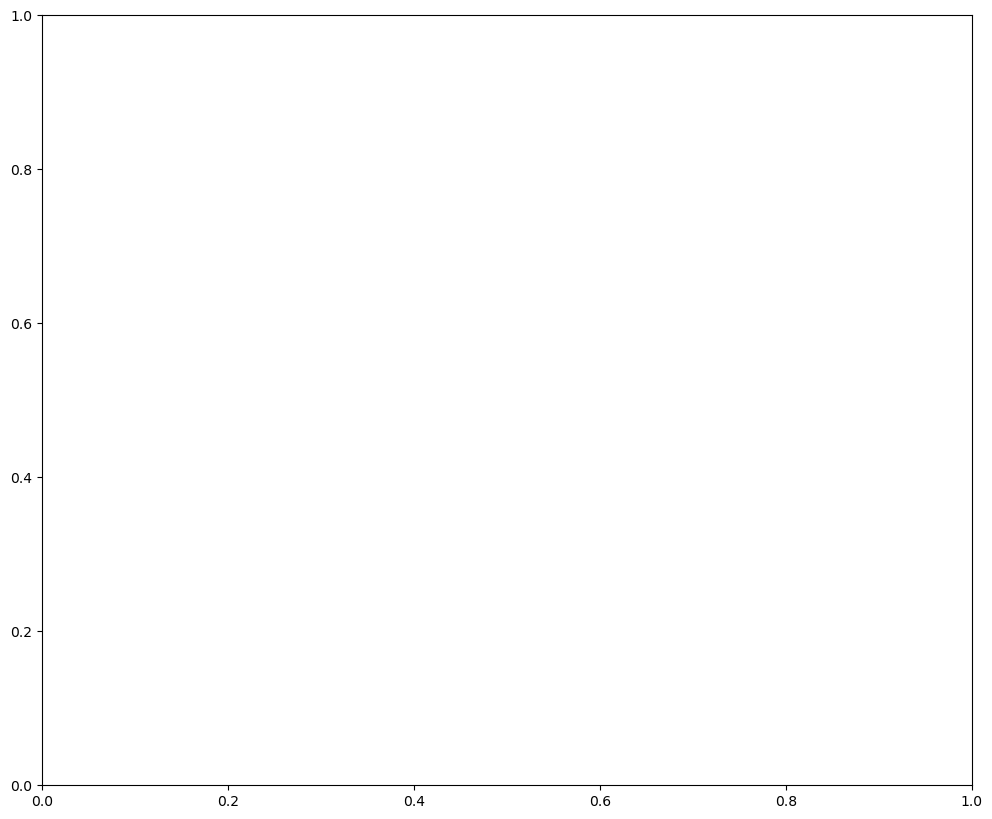

In [291]:
#barplot artists by sum of songs
fig, ax = plt.subplots(figsize = (12,10))
ax = sns.barplot(x = top20, y = top20.index, palette = 'rocket_r', orient = 'h', edgecolor = 'black', ax = ax)
ax.set_xlabel('Songs', c = 'r', fontsize = 12, weight = 'bold')
ax.set_ylabel('Artists',c = 'r', fontsize = 12, weight = 'bold')
ax.set_title('20 Most Prolific Artists on Spotify', c= 'r', fontsize = 14, weight = 'bold')
plt.show()

In [7]:
music_df.info()
music_df['followers'] = music_df['followers'].fillna(0)
music_df['followers'] = music_df['followers'].astype(int)
music_df.info()
music_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,1104349.0,10742.917927,260953.857619,0.0,10.0,59.0,451.0,78900234.0
popularity,1104349.0,9.083884,13.763096,0.0,0.0,2.0,14.0,100.0


In [ ]:
x = music_df["followers"].values
y = music_df["popularity"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(7,5))
fig.suptitle("Correlation Between Followers and Popularity")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha= 0.5)
ax.plot(x, regr.predict(x), color= "red", linewidth=3)

plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(500))

ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))

plt.xlabel("Followers")
plt.ylabel("Popularity")

plt.show()